In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0,9.0)

In [2]:
# Load data
data = pd.read_csv('hw3_data.csv', header = 0, names = ['x_val', 'y_val'])
x_train = np.reshape(np.array(data['x_val']), (5000,1))
y_train = np.reshape(np.array(data['y_val']), (5000,1))
np.random.seed(0)

In [3]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward(self, output_error, learning_rate):
        raise NotImplementedError

In [4]:
class Hidden_Layer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, n_input, n_output):
        self.weights = np.random.randn(n_input, n_output)
        self.bias = np.zeros((1, n_output))

    # returns output for a given input
    def forward(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [5]:
class Activation_Layer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [6]:
def relu_activation(x):
    return np.maximum(0, x)

def d_relu_activation(x):
    return x > 0

def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [7]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

In [10]:
# network
net = Network()
net.add(Hidden_Layer(1, 10))
net.add(Activation_Layer(relu_activation, d_relu_activation))
net.add(Hidden_Layer(10, 10))
net.add(Activation_Layer(relu_activation, d_relu_activation))
net.add(Hidden_Layer(10, 1))
net.add(Activation_Layer(relu_activation, d_relu_activation))

# train
net.use(mse, mse_prime)
net.fit(x_train, y_train, epochs=10, learning_rate=0.1)

# test
out = net.predict(x_train)
print(out)

epoch 1/10   error=45.681045
epoch 2/10   error=45.014950
epoch 3/10   error=45.014950
epoch 4/10   error=45.014950
epoch 5/10   error=45.014950
epoch 6/10   error=45.014950
epoch 7/10   error=45.014950
epoch 8/10   error=45.014950
epoch 9/10   error=45.014950
epoch 10/10   error=45.014950
[array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), arr

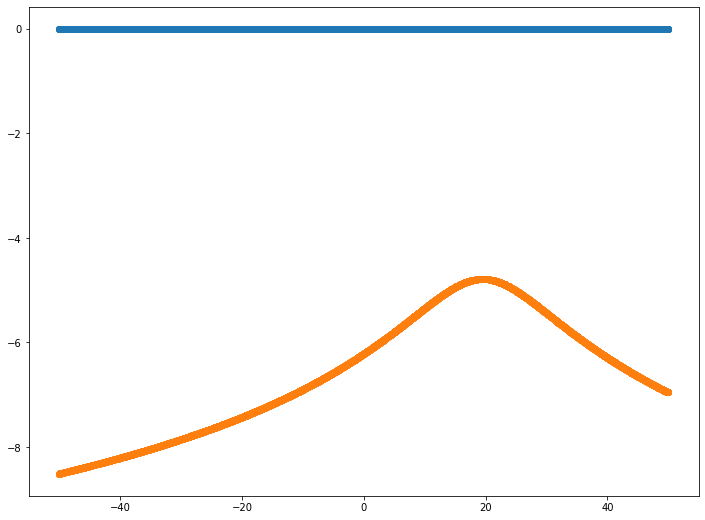

In [11]:
plt.scatter(x_train, out)
plt.scatter(x_train, y_train)